In [2]:
import os
current = os.getcwd()
print('현재경로:', current)

new = 'd:/study/python'
os.chdir(new)
print('변경경로:', new)

현재경로: c:\Users\human\Desktop
변경경로: d:/study/python


In [3]:
import pandas as pd
import numpy as np

rd = pd.read_csv('src/rawdata.csv', encoding='cp949')

rd.head()

C:\Users\human\AppData\Local\Temp\ipykernel_16344\2234196475.py:4: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  rd = pd.read_csv('src/rawdata.csv', encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11500,강서구,10900,방화동,1,대지,614,11,원미,...,58000,63.060,0.0,4,NaN,NaN,1988.0,아파트,중개거래,경북 경산시
1,2024,11440,마포구,11000,노고산동,1,대지,107,36,현대벤처빌,...,22000,27.900,0.0,16,NaN,NaN,2002.0,아파트,중개거래,서울 마포구
2,2024,11350,노원구,10300,공릉동,1,대지,743,0,공릉동한보에센시티아파트,...,51500,59.400,0.0,10,NaN,NaN,2000.0,아파트,중개거래,서울 노원구
3,2024,11530,구로구,10200,구로동,1,대지,103,6,구로오네뜨시티,...,15000,16.710,0.0,13,NaN,NaN,2022.0,아파트,직거래,NaN
4,2024,11110,종로구,17500,숭인동,1,대지,766,0,종로청계힐스테이트,...,105000,84.947,0.0,18,NaN,20240514.0,2009.0,아파트,중개거래,서울 종로구


In [4]:
rd_price_mean = rd.groupby(['자치구명', '접수연도'])['물건금액(만원)'].mean()
print(rd_price_mean)

자치구명  접수연도
강남구   2017    125527.938857
      2018    153023.468684
      2019    179367.472522
      2020    183355.695412
      2021    207629.926495
                  ...      
중랑구   2020     50484.885705
      2021     64318.963308
      2022     49640.805604
      2023     57045.299154
      2024     58175.150901
Name: 물건금액(만원), Length: 200, dtype: float64


In [18]:
# 자치구별로 연평균 증가율을 저장할 빈 리스트 생성
cagr_results = []

# 각 자치구별로 연평균 증가율을 계산
for gu in rd_price_mean.index.levels[0]:
    gu_data = rd_price_mean.loc[gu]  # 특정 자치구의 데이터만 선택
    
    # 연평균 증가율을 계산하기 위해 데이터 정렬
    gu_data_sorted = gu_data.sort_index()

    # 연평균 증가율 계산
    start_price = gu_data_sorted.iloc[0]  # 시작 연도의 매매가
    end_price = gu_data_sorted.iloc[-1]   # 마지막 연도의 매매가
    periods = len(gu_data_sorted) - 1     # 총 기간에서 1을 뺀 것이 증가율을 구할 때 사용할 연도 개수

    cagr = ((end_price / start_price) ** (1 / periods)) - 1  # CAGR 공식을 사용하여 연평균 증가율 계산
    cagr_percent = round(cagr * 100, 2)  # 소수점 이하 2자리까지 반올림하고 퍼센트로 변환

    # 결과를 리스트에 추가
    cagr_results.append({'자치구명': gu, 'CAGR': cagr_percent})

# 결과를 DataFrame으로 변환
cagr_df = pd.DataFrame(cagr_results)

#자치구명을 인덱스로 설정
cagr_df.set_index('자치구명', inplace=True)

print(cagr_df)

       CAGR
자치구명       
강남구    9.41
강동구    9.02
강북구    6.82
강서구    7.35
관악구    7.85
광진구    9.10
구로구    7.46
금천구    7.99
노원구    8.23
도봉구    6.94
동대문구   7.73
동작구    7.68
마포구    8.92
서대문구   7.99
서초구   10.07
성동구   10.12
성북구    7.41
송파구    9.53
양천구    8.24
영등포구   9.40
용산구   11.94
은평구    7.22
종로구    8.83
중구     7.05
중랑구    7.36


In [6]:
pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<Figure size 1000x600 with 0 Axes>

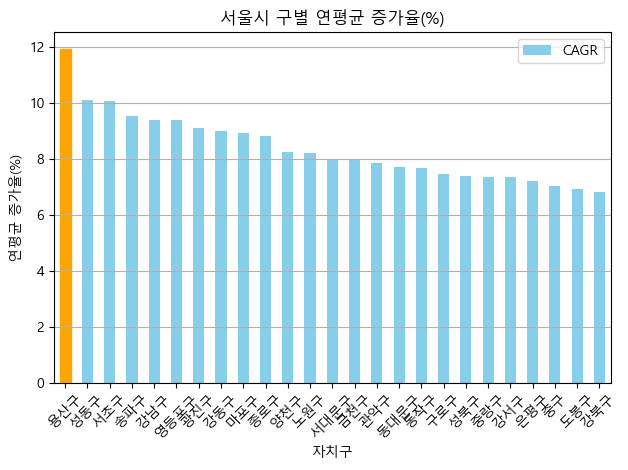

In [30]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

#연평균 증가율을 정렬
cagr_df_sorted = cagr_df.sort_values(by='CAGR', ascending=False)

plt.figure(figsize=(10,6))
ax=cagr_df_sorted.plot(kind='bar', color='skyblue')
plt.title('서울시 구별 연평균 증가율(%)')
plt.xlabel('자치구')
plt.ylabel('연평균 증가율(%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

bars=ax.patches
bars[0].set_color('orange')

plt.show()


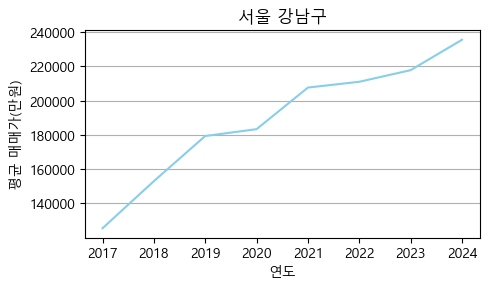

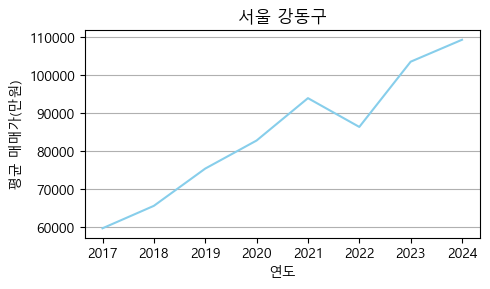

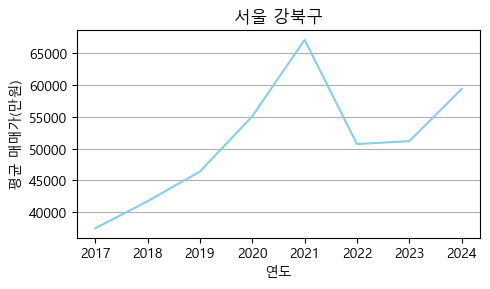

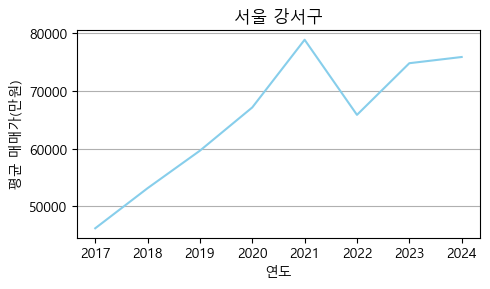

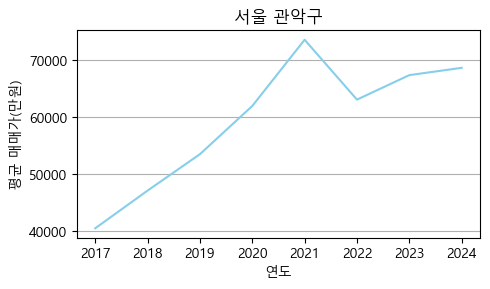

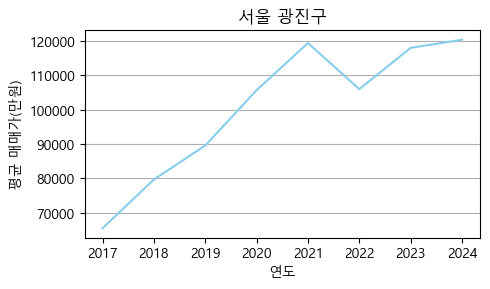

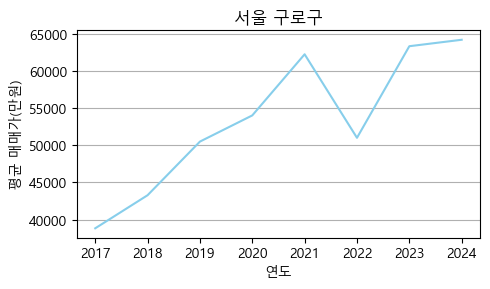

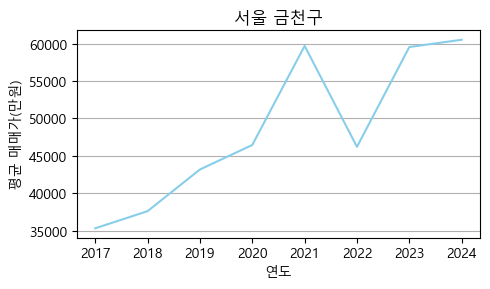

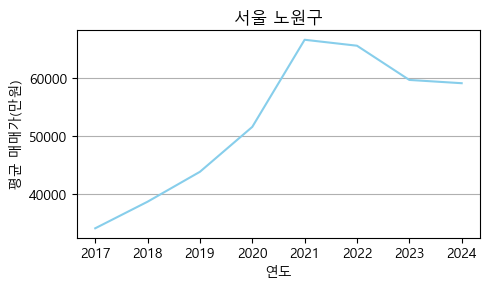

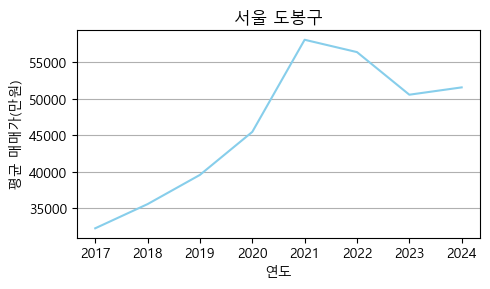

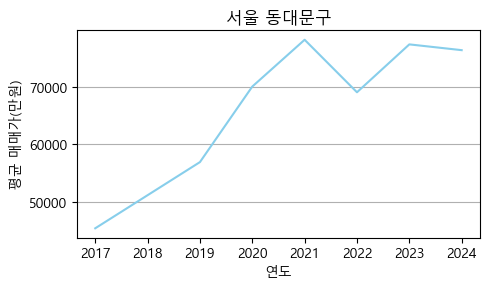

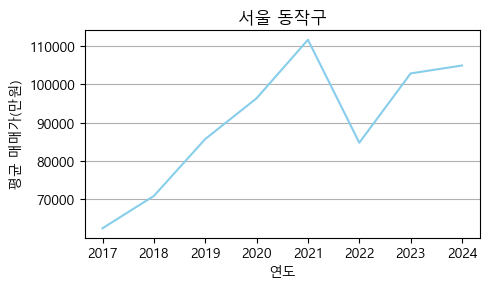

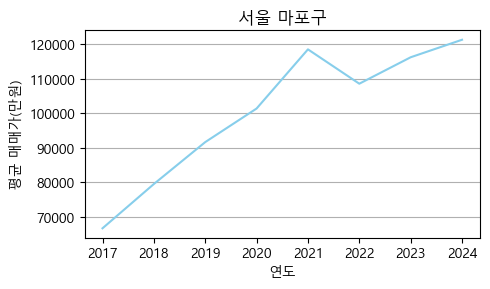

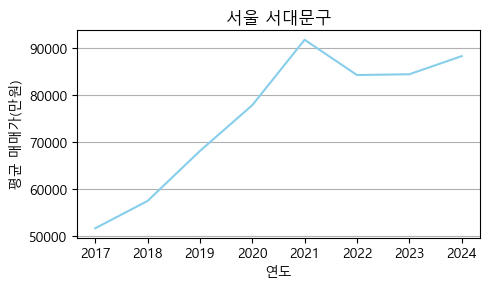

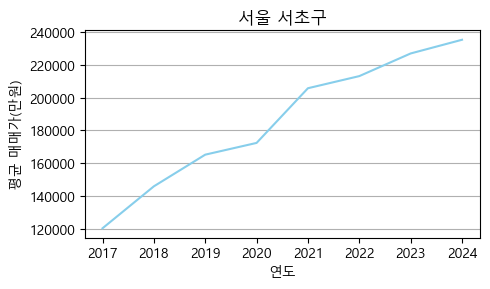

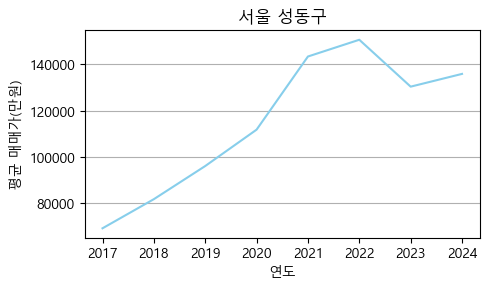

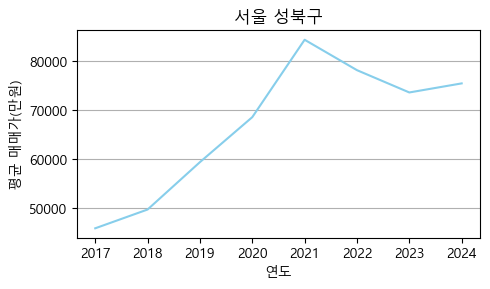

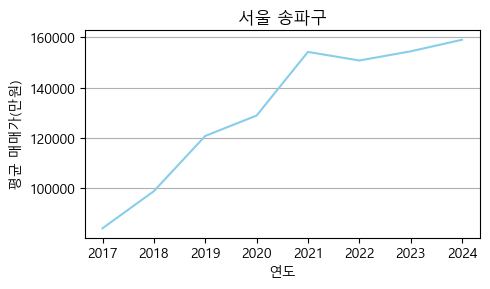

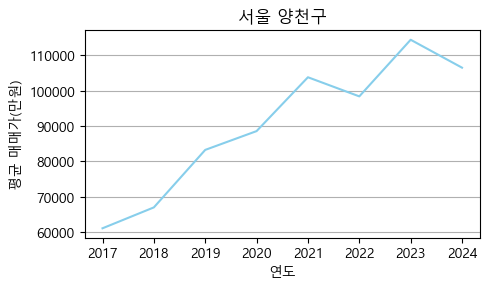

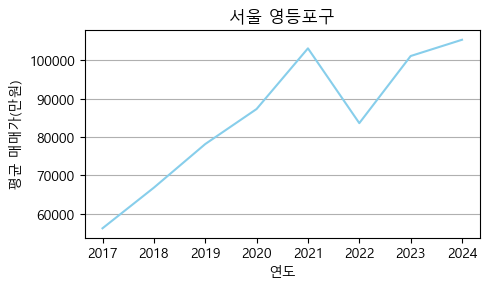

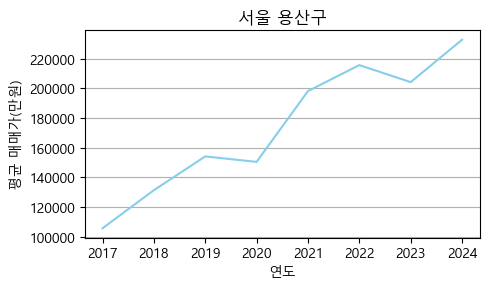

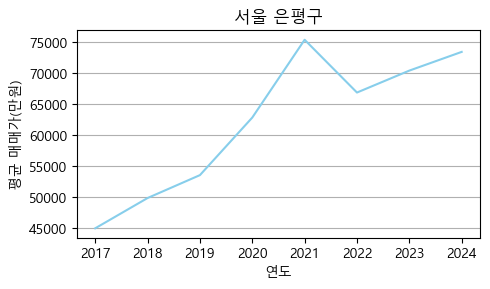

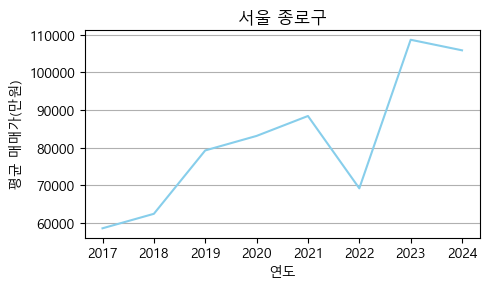

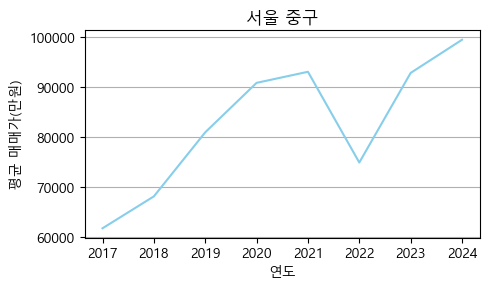

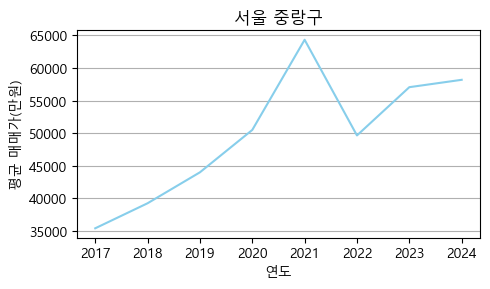

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 각 자치구명 별로 개별적인 그래프 그리기
for gu in rd_price_mean.index.levels[0]:
    gu_data = rd_price_mean.loc[gu]  # 특정 자치구의 데이터만 선택
    
    # 그래프 그리기
    plt.figure(figsize=(5, 3))  # 그래프의 크기 설정
    plt.plot(gu_data.index, gu_data.values, color='skyblue')  # 그래프 생성
    plt.xlabel('연도')  # x축 라벨 설정
    plt.ylabel('평균 매매가(만원)')  # y축 라벨 설정
    plt.title(f'서울 {gu}')  # 그래프 제목 설정
    plt.grid(axis='y')  # y축에 대해서만 그리드 표시
    plt.tight_layout()  # 그래프 여백 조정
    plt.savefig(f'{gu}_연평균증가율 그래프(연도별 평균매매가).png') #그래프 저장
    plt.show()  # 그래프 출력
